# Magics 4.11.0 ( Released 03/03/2022)

In [1]:
from Magics import macro as magics

## User defined coastlines

In Magics there is a possibility for the user to use her own set of shapefiles as coastlines. 
In this version, we added a parameter **map_user_layer_land_colour**(*Default:NONE*). If given a colour , the user coastlines will be filled.  

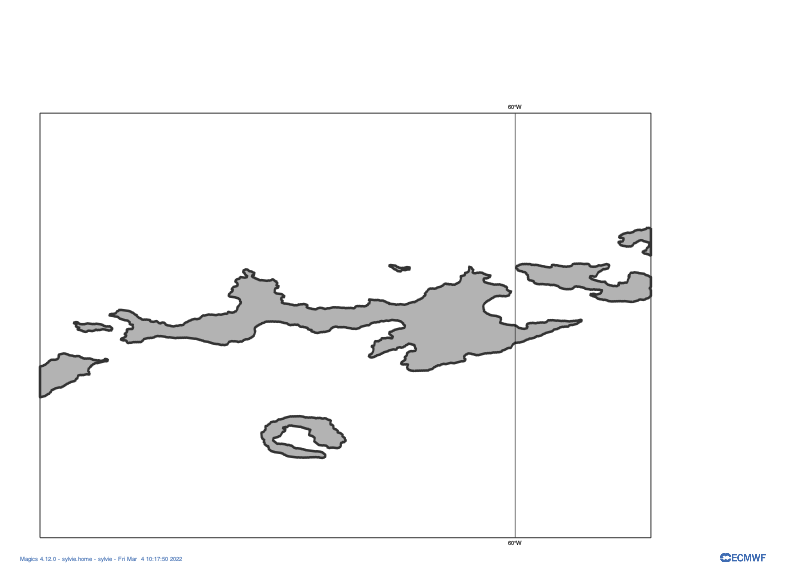

In [2]:
map = magics.mmap(
subpage_map_projection = 'cylindrical',
subpage_lower_left_longitude = -61.4,
subpage_lower_left_latitude = -63.25,
subpage_upper_right_longitude = -59.6,
subpage_upper_right_latitude = -62.0,
)

coast = magics.mcoast(
map_coastline = "off",
map_user_layer = 'on',
map_user_layer_name = 'release-4.11.0/user-coastlines/GSHHS_f_L5',
map_user_layer_land_colour = 'grey',
map_user_layer_colour = 'charcoal',
map_user_layer_thickness = 5
)

magics.plot(map,coast)

## Observations Templating 

Magics allows users to define a XML template to display observations-like information.
The template describes how to position the information. 
Users is able to pass a json object as observation, and Magics will use the template to position the different items of the observation.

In [4]:
with open("release-4.11.0/obs-template/obs.template") as f:
    template = f.readlines()
for l in template:
    print(l)

<observations>

	<obs_template type='guan_plot' rows='3' columns='3'>

     	<obs_identification colour='navy' row='0' column='0'/>   

     	<obs_string format='${freq00}/${gross00}' colour='blue' row='1' column='-2'/>      

     	<obs_string format='${freq06}/${gross06}' colour='red' row='1' column='2'/>

     	<obs_string format='${freq12}/${gross12}' colour='purple' row='-1' column='-2'/>      

     	<obs_string format='${freq18}/${gross18}' colour='green' row='-1' column='2'/>            

 	</obs_template>

</observations>



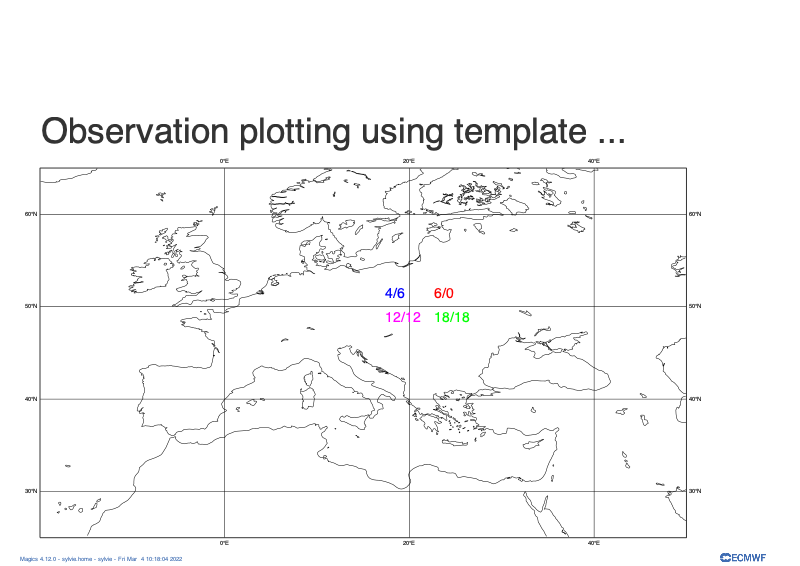

In [5]:
import json

projection = magics.mmap(
    subpage_x_length=24.0,
    subpage_upper_right_longitude=50.00,
    subpage_upper_right_latitude=65.00,
    subpage_lower_left_latitude=25.00,
    subpage_lower_left_longitude=-20.0,
    subpage_map_projection="cylindrical",
)

coastlines = magics.mcoast()

observations = {"type": "guan_plot",
        "identifier": "station1",
        "freq00": 4.,
        "gross00": 6.,
        "freq06": 6.,
        "gross06":0.,
        "freq12": 12.,
        "gross12": 12.,
        "freq18": 18.,
        "gross18": 18.,
        "longitude": 20,
        "latitude": 50}

obs = magics.mobs(
    obsjson_info_list=[
       json.dumps(observations)
    ],
    obs_template_file_name="release-4.11.0/obs-template/obs.template",
    obs_size=0.6,
    obs_ring_size=0.2,
    obs_distance_apart=0.0,
)
title = magics.mtext(
    text_lines=["Observation plotting using template ..."],
    text_justification="left",
    text_font_size=1.5,
    text_colour="charcoal",
)

magics.plot(projection, coastlines, obs, title)

## LineString in GeoJSon 

Magics is now supporting the feature **Linestring** from the [GeoJSON](https://geojson.org/) format. 

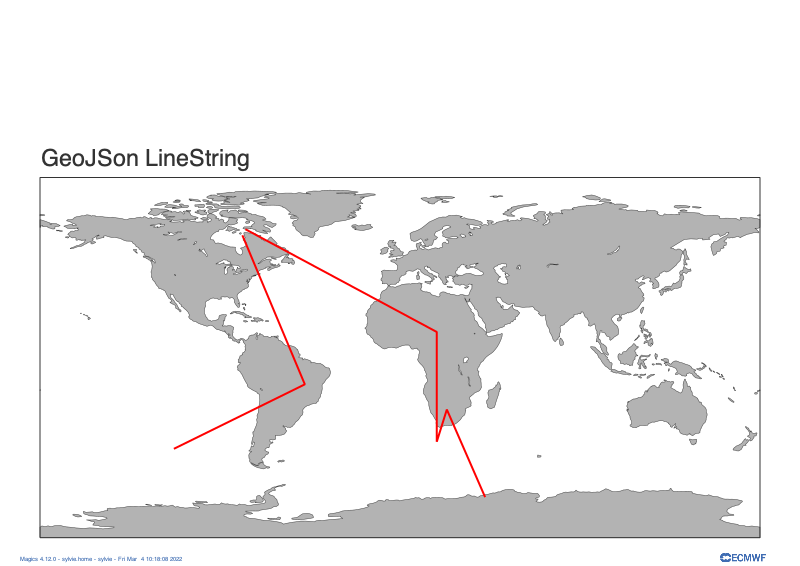

In [6]:
background = magics.mcoast( map_coastline_sea_shade_colour= 'white',
                     map_coastline_land_shade_colour= 'grey',
                     map_grid= 'off',
                     map_coastline_land_shade= 'on',
                     map_coastline_sea_shade= 'on',
                     map_label= 'off',
                     map_coastline_colour= 'charcoal')

fronts =  magics.mgeojson( geojson_input_filename = 'release-4.11.0/linestring.geojson',)
red = magics.mline(polyline_line_colour = "red", polyline_line_thickness = 4)


title = magics.mtext(text_lines = ["<font size='1'>GeoJSon LineString</font>",],
	      text_justification = 'left',
	      text_font_size = 0.8,
	      text_colour = 'charcoal')

magics.plot(background, fronts, red, title)

## Fortran interface 
A bug was fixed in the Fortran interface when popen/pclose were called in a loop.
